# 16장 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

<br><center>
<img src ="https://drive.google.com/uc?id=1XnLRGBH8hQRhTl-UBrNJr-Odn285dHhX" width=400>
</center><br>
급히 전달 받은 노트에 숫자가 적혀 있습니다. 뭐라고 쓰여있는지 읽기에 어렵지 않습니다. 일반적인 사람에게 이 사진에 나온 숫자를 읽어 보라고 하면 대부분 '504192'라고 일겠지요. 그런데 컴퓨터에 이 글씨를 읽게 하고 이 글씨가 어떤 의미인지 알게 하는 과정은 쉽지 않습니다. 사람이 볼 때는 쉽게 알수 있는 글씨라고 하더라도 숫자 5는 어떤 특징을 가졌고 숫자 9는 6과 어떻게 다른지 기계가 스스로 파악해 정확하게 읽고 판단하게 만드는 것은 머신 러닝의 오랜 진입 과제였습니다. 

**MNIST 데이터셋은 미국 국립표준기술원(NIST)이 고등학생과 인구조사국 직원 등이 쓴 손 글씨를 이용해 만든 데이터로 구성되어 있습니다.** 7만 개의 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋으로 머신 러닝을 배우는 사람이라면 자신의 알고리즘과 다른 알고리즘의 성과를 비교해 보고자 한 번씩 도전해 보는 유명한 데이터 중 하나 입니다. 

<br><center>
(그림. 16-1) MNIST 손글씨 데이터 이미지<br>
<img src="https://drive.google.com/uc?id=1Qk2TBWCeUWTwoKjgj741m12W5akADIKJ">
</center><br>  

지금까지 배운 딥러닝을 이용해서 과연 이 손글씨 이미지를 몇 %나 정확히 예측할 수 있을까요?

## 1. 이미지를 인식하는 원리
MNIST 데이터는 텐서플로의 케라스 API를 이용해 간단히 불러 올 수 있습니다.  

```from tensorflow.keras.datasets import mnist```

이 때 불러온 이미지 데이터를 X로 이 이미지에 0\~9를 붙인 이름표를 y로 구분해 표시하겠습니다.  

```(X_train, y_train), (X_test, y_test) = mnist.load_data()```  

케라스의 MNIST 데이터는 총 7만개 이미 중 6만개를 학습용으로 1만 개는 테스트용으로 미리 구분해 놓고 있습니다. 이런 내용은 다음과 같이 확인할 수 있습니다.  

```
print('학습 데이터셋 이미지 수 :', X_train.shape[0])
print('테스트 데이터셋 이미지 수 :', X_test.shaep[0])
```





In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

불러온 이미지들 중 한 개만 출력해 보겠습니다.

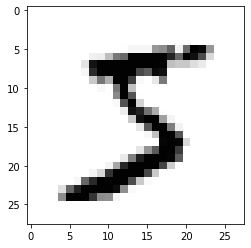

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

이 이미지를 컴퓨터는 어떻게 인식할까요?

이 이미지는 가로 28, 세로 28 픽셀 크기입니다. 28 x 28 = 784개의 픽셀로 구성되어 있습니다. 각 픽셀은 밝기 정도에 따라 0부터 255까지 등급을 매깁니다. 흰색 픽셀이의 값이 0이라면 1부터 255까지 옅은 회색에서 점점 더 어두워져 최종적으로 픽셀값이 255는 완전한 검은색이 됩니다. 따라서 위 이미지는 0~255까지의 값을 갖는 행렬로 해석할 수 있습니다. 다시 말해 집합 또는 배열로 생각할 수 있습니다.

In [ ]:
import sys

for pixel_line in X_train[0]:
  for pixel in pixel_line:
    sys.stdout.write("%-4s" % pixel)
  sys.stdout.write('\n')

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0   
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0   
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0   
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   

이렇게 이미지는 숫자의 집합으로 바뀌어 학습 데이터셋으로 사용됩니다. 우리가 앞서 배운 여러 예제와 마찬가지로 속성을 담은 데이터 모델에 집어 넣고 클래스를 예측하는 문제로 귀결되는 것입니다. 28x28=784개의 속성을 이용해 0\~9의 클래스 열 개중 하나를 맞추는 문제가 됩니다. 

이제 주어진 가로 28 세로 28의 2차월 배열을 1차원 배열로 바꾸어주어야 합니다. 이를 위해 ```reshape()```함수를 사용합니다. 

reshape(총 샘플 수, 1차원 속성의 개수) 형식으로 지정합니다. 총 샘플 수는 앞서 사용한 X_train.shape[0]을 이용하고 1차원 속성의 개수는 이미 살펴 본 대로 784입니다.
```
X_train=X_train.reshape(X_train.shape[0], 784)
```



케라스는 데이터를 0에서 1 사이의 값으로 변환 후 구동할 때 최적의 성능을 보입니다. 따라서 현재 0\~255 사이의 수로 표현되는 픽셀의 값을 0\~1 사이의 값으로 바꿔야 합니다. 바꾸는 방법은 각 픽셀의 값을 255로 나누면 됩니다. 이러한 과정, 0~1사이의 값으로 바꾸는 과정을 '정규화(normalization)'라고 합니다. 정규화에 앞서 데이터형을 실수로 빠꾼 후 정규화 합니다.   

```
X_train = X_train.astype('float64')
X_train = X_train / 255
```

X_test에 대해서도 위와 같은 이유에서 동일한 작업을 수행합니다.
```
X_test = X_text.reshape(X_test.shape[0], 784).astype('flat64')/255
```  
이제 숫자 이미지에 대해 붙여진 이름(클래스, 레이블)을 확인해 보겠습니다. 우리는 앞서 불러온 숫자 이미지가 5라는 것을 눈으로 보아 알 수 있었습니다. 실제로 이 숫자의 레이블이 어떤지 불어오고자 합니다.



In [ ]:
print('class(label) :', y_train[0])

class(label) : 5


그런데 12장에서 아이리스 품종을 예측할 때 딥러닝의 분류 문제를 해결하려면 원-핫 인코딩 방식을 적용해야 한다고 배웠습니다. 즉, 0\~9의 정수형 값을 갖는 현재 형태에서 0 또는 1로만 이루어진 값으로 수정해야 합니다.   
지금 우리가 본 이미지의 클래스(레이블)은 5였습니다. 이를 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]으로 바꿔야 합ㄴ니다. 이를 가능하게 해주는 함수가 ```np_utils.to_categorical()```함수입닌다. ```to_categorical(클래스, 그래스의 개수)```형식으로 지정합니다.

```
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
```

In [ ]:
from tensorflow.keras.utils import to_categorical

print(y_train[0])
y_train = to_categorical(y_train, 10)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


지금까지 이야기한 내용과 관련된 코드를 아래 모았습니다.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다. 
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11501568/11490434 [==============================] - 1s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


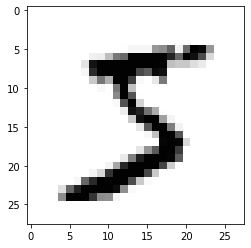

In [ ]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2. 딥러닝 기본 프레임 만들기 
모델 구조를 정하고 모델을 커파일 하는 단계로 넘어가겠습니다. 

총 784개의 속성이 있고 열 개의 클래스(레이블)가 있습니다. 그래서 다음과 같이 모델을 생성합니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### [과제]
과제 - 본 실습을 위해 모델 구조를 다음과 같이 제안합니다.
* 은닉층 1개로 구성
* 은닉층의 노드 개수는 512개
* 은닉층의 활성화 함수는 relu
* 출력측의 활성화 함수는 softmax
가 되도록 코딩하십시요.

In [ ]:
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### [과제] 
과제 - 모델 실행 환경을 위한 설정을 다음과 같이 제안합니다.
* 다중 분류 상황이기 때문에 손실 함수(loss function)는 categorical_crossentropy
* 옵티마이저는 adam

In [ ]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18336, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18336 to 0.13463, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13463 to 0.11727, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11727 to 0.09638, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09638 to 0.09213, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss did not improve from 0.09213

Epoch 7: val_loss improved from 0.09213 to 0.08812, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.08812 to 0.08243, saving model to ./MNIST_MLP.hdf5

Epoch 9: val_loss improved from 0.08243 to 0.07986, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.07986

Epoch 11: val_loss did not improve from 0.07986

Epoch 12: val_loss did not improve from 0.07986

Epoch 13: val_loss did not improve from 0.07986

Epoch 14: val_loss did not improve from 0.07986

Epoch 15: val_loss did

**실행 결과를 그래프로 표현**해보려고 합니다. 역시 14장에서 실습한 내용과 크게 다르지 않습니다. 다만 이번에는 학습 데이터셋의 정확도 대신 학습 데이터셋의 오차를 그래프로 표현하겠습니다. 학습 데이터셋의 오차는 1에서 학습 데이터셋에 대한 정확도를 뺀 값입니다. 좀 더 세밀한 변화를 볼 수 있도록 학습 데이터셋 오차와 테스테 데이터셋의 오차를 그래프 하나에 나타내겠습니다.

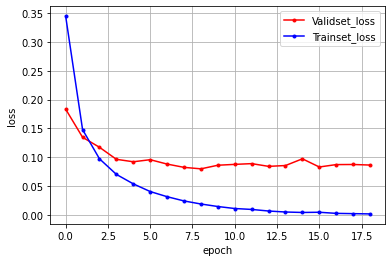

In [ ]:
# 검증(validation) 데이터셋과 학습 데이터셋의 오차를 저장합니다. 
# 실제 값이 검증 데이터셋과 예측 값 사이의 차이
# 실제 값인 학습 데이터셋과 예측 값 사이의 차이

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

epoch가 19(?)에서 갱신(모델업데이트 과정)을 멈췄습니다. 갱신 과정(다음 에포크)을 더 진행했다면 학습 데이터셋에 대한 오차는 줄어 들 수 있으나 검증 데이터셋의 더 이상 작아지지 않고 학습 데이터셋에 대한 과적합(overfit)으로 오히려 검증 데이터에 대한 에러가 커질 수 있습니다.  

앞서 높은 정확도를 보였던 딥러닝 모델은 하나의 은닉층을 두 아주 단순한 모델입니다. 이를 도식화 하면 그림 16-5와 같습니다.  
<br><center>
<img src="https://drive.google.com/uc?id=12E2tAvpsXXYEb__X9LYuKkS1iGZV3j-n" width=200>.................
<img src="https://drive.google.com/uc?id=11x6By8NmA3K-B_D6N5Vev1tqYKPpy7LC" width=400>
</center><br>

딥러닝은 이러한 기본 모델을 바탕으로 프로젝트에 맞추어 어떤 옵션을 더하고 어떤 층을 추가하느냐에 따라 성능이 좋아질 수 있습니다. 지금부터 기본 딥러닝 모델에 이미지 인식 분야에 강력한 성능을 보이는 컨볼류션 신경망(CNN)을 추가해 보겠습니다.

# 아래 내용은 조금 더 익숙해진 이후에 학습하는 것으로...






## 3. 컨볼루션 신경망

**컨볼루션 신경망(Convolutional Neural Network)은 입력된 이미지에서 다시 한 번 특징을 추출하기 위해 커널(슬라이딩 원도우)를 도입하는 기법입니다.** 예를 들어 입력된 이미지가 다음과 같은 값을 가지고 있다고 가정하겠습니다.
<br><center>
<img src="https://drive.google.com/uc?id=1kmkb3v9yT9zhjpNDExlEiU5KodZ9uPYg" width=200>
</center><br>

여기에 2x2 커널을 준비합니다. 각 칸에는 가중치가 들어 있습니다. 샘플 가중치를 다음과 같이 x1, x0이라고 하겠습니다. 
<br><center>
<img src="https://drive.google.com/uc?id=1MjjrQVgD3FOb0tDn4uuCnum6GGaFp8R1" width=100>
</center><br>  
이제 이 커널을 이미지 맨 왼쪽 윗칸에 적용시켜 보겠습니다. 

<br><center>
<img src="https://drive.google.com/uc?id=1RDiYx3pu4cll4uoh57ptH12bBx8lJrbC" width=200>
</center><br>  
적용된 부분은 원래 있던 이미지 값에 가중치의 값을 곱해서 각각의 값을 합산해 새로운 값을 생성합니다.  
$$(1\times1) + (0\times0) +(0\times0) + (1\times1)=2$$  

이 커널을 한 칸씩 옮겨 모두 적용해 보겠습니다. 
<br><center>
<img src="https://drive.google.com/uc?id=1ukY_jnDI-Isg0q7mW3mIf2SokQQs3mB0" width=400><br>
<img src="https://drive.google.com/uc?id=1NrxBhRRLIc3dW1ZYr2kL8zPIjIwp2uf9" width=400><br>
<img src="https://drive.google.com/uc?id=1tibqQCTOeRD7xyG66YmzVYBvAK8VMcnK" width=400>
</center><br>
위 결과를 정리하면 다음과 같습니다.

<br><center>
<img src="https://drive.google.com/uc?id=1O1cBeGghvfegnNCacKAN8IK1Vf9KL57V" width=200>
</center><br>  

이렇게 해서 새롭게 만들어진 층을 컨볼루션(합성곱) 층이라고 합니다. 컨볼루션 층을 만들려면 입력 데이터가 가진 특성을 대략적으로 추출해서 학습을 진행할 수 있습니다. 이러한 커널을 여러 개 만들 경우 여러 개의 컨볼루션 층이 만들어집니다.   

[그림](https://thebook.io/080324/part05/ch16/03-03/)

케라스에서 컨볼루션 층을 추가하는 함수는 ```Conv2D()```입니다. 다음과 같이 컨볼루션 층을 적용해 MNIST 손글씨 인식률을 높여 봅시다. 

```
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
```

```Conv2D()```에 전달되는 네 가지 인자는 다음과 같습니다. 
- 첫번재 인자: 커널을 몇 개 적용할지 결정. 여기서는 32개의 커널을 적용했음.
- kernel_size: 커널의 크기. ```kernel_size(행, 열)``` 형식으로 지정. 여기서는 3 $\times$ 3  
- input_shape: Dense 층과 마찬가지로 맨 처음 층에는 입력되는 값의 형태 등을 알려주야 함. ```input_shape=(행, 열, 색상타입)``` 형식으로 정합니다. 컬러이미지면 색상타입은 3이고 흑백이면 1입니다. 여기서는 28 $\times$28 크기의 흑백 이미지를 사용한다고 지정했음.
- activation: 사용할 활성화 함수.

이어서 컨벌루션 층을 하나 더 추가해 보겠습니다. 다음과 같이 커널 수는 64개, 커널의 크기는 3 $\times$ 3으로 지정하고 활성화 함수로 렐루를 사용하는 컨볼루션 층을 추가합니다. 

```
model.add(Conv2D(64, (3, 3), activation='relu'))
```
<br><center>
<img src="https://drive.google.com/uc?id=11x6By8NmA3K-B_D6N5Vev1tqYKPpy7LC" width=500>
</center><br>


## 4. 맥스 폴링, 드롭아웃, 플래트


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망의 설정
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.08178, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00002: val_loss improved from 0.08178 to 0.05578, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00003: val_loss improved from 0.05578 to 0.04809, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00004: val_loss improved from 0.04809 to 0.04628, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00005: val_loss improved from 0.04628 to 0.04344, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00006: val_loss did not improve from 0.04344

Epoch 00007: val_loss improved from 0.04344 to 0.04101, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00008: val_loss improved from 0.04101 to 0.03858, saving model to ../data/model\MNIST_CNN.hdf5

Epoch 00009: val_loss did not improve from 0.03858

Epoch 00010: val_loss did not improve from 0.03858

Epoch 00011: val_loss did not improve from 0.03858

Epoch 00012: val_loss did not improve from 0.03858

Epoch 00013: val_loss improve

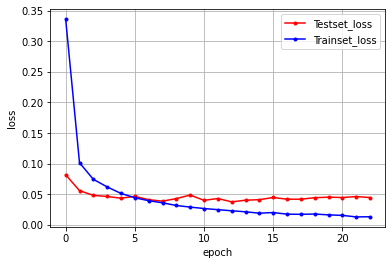

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()